In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import *
from datetime import datetime

# Read all required csv and excel files

In [2]:
impressions = pd.read_csv('stark_impressions.csv', low_memory = False)
clicks = pd.read_csv('stark_clicks.csv')
installs = pd.read_csv('stark_installs.csv')
country = pd.read_excel('country_mapping.xlsx')

# Add clicks and installs (binary outcomes) columns to impressions.
# Create impressions_install corresponding to impression leading to installation

In [3]:
impressions = impressions.assign(clicks=impressions['Unique Id'].isin(clicks['Unique Id']).astype(int))
installs = installs[installs['is_valid_unique_id'] == 1]
installs = installs[installs['can_claim'] == 1]
impressions = impressions.assign(installs=impressions['Unique Id'].isin(installs['Unique Id']).astype(int))
impressions_install = impressions[impressions['installs'] == 1]
#impressions_clicks = impressions[impressions['clicks'] == 1]

# Filter out features with install =1 and check percentages

# 1. Countries

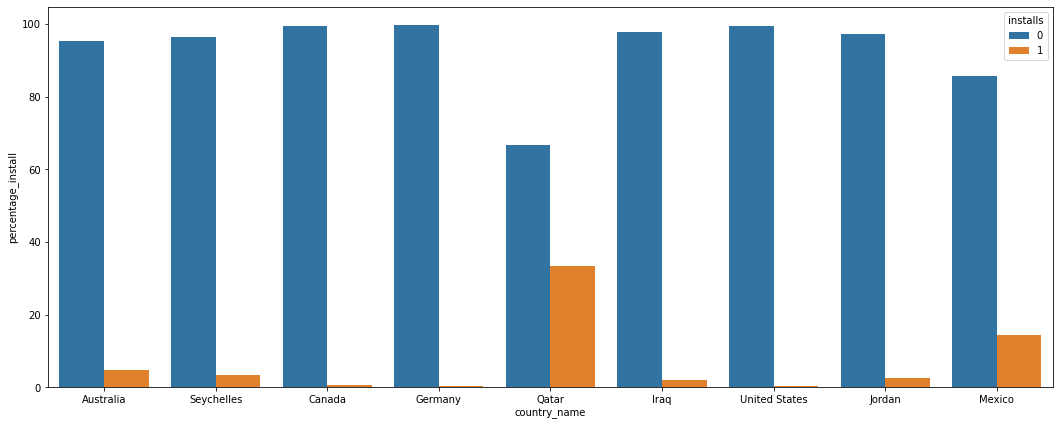

In [4]:
df_countries_impressions = impressions[impressions['REQ_COUNTRY_ID'].isin(impressions_install['REQ_COUNTRY_ID'].unique().tolist())]
df_countries_value_counts = df_countries_impressions['REQ_COUNTRY_ID'].value_counts().to_frame().reset_index()
df_countries_value_counts.columns = ['REQ_COUNTRY_ID', 'total_occurrences']

df_countries_counts = (df_countries_impressions.groupby(['REQ_COUNTRY_ID'])['installs']
                     .value_counts(normalize=True)
                     .rename('percentage_install')
                     .mul(100)
                     .reset_index()
                     .sort_values('installs'))

df_countries_counts['country_name'] = df_countries_counts['REQ_COUNTRY_ID'].map(country.set_index('REQ_COUNTRY_ID')['COUNTRY_NAME'])
df_countries_counts['total_occurrences'] = df_countries_counts['REQ_COUNTRY_ID'].map(df_countries_value_counts.set_index('REQ_COUNTRY_ID')['total_occurrences'])

plt.figure(figsize=(18,7))
sns.barplot(x="country_name", y="percentage_install", hue="installs", data=df_countries_counts)
plt.show()

In [111]:
impressions_install['REQ_COUNTRY_ID'].value_counts()

246    1181
50        9
93        5
208       2
124       2
116       2
190       1
154       1
24        1
0         1
Name: REQ_COUNTRY_ID, dtype: int64

In [5]:
df_countries_counts[df_countries_counts['installs'] == 1].sort_values(by = 'percentage_install', ascending = False)

,REQ_COUNTRY_ID,installs,percentage_install,country_name,total_occurrences
15,190,1,33.333333,Qatar,3
13,154,1,14.285714,Mexico,7
3,24,1,4.761905,Australia,21
17,208,1,3.508772,Seychelles,57
11,124,1,2.702703,Jordan,74
9,116,1,2.105263,Iraq,95
5,50,1,0.618132,Canada,1456
1,0,1,0.534759,NaN,187
19,246,1,0.428792,United States,275425
7,93,1,0.281215,Germany,1778


In [119]:
country_value_counts = impressions['REQ_COUNTRY_ID'].value_counts().to_frame().reset_index()
country_value_counts.columns = ['REQ_COUNTRY_ID', 'value_counts']
country_value_counts

,REQ_COUNTRY_ID,value_counts
0,246,275425
1,93,1778
2,50,1456
3,0,187
4,122,181
...,...,...
67,26,1
68,120,1
69,14,1
70,91,1


# 2. Campaign ID

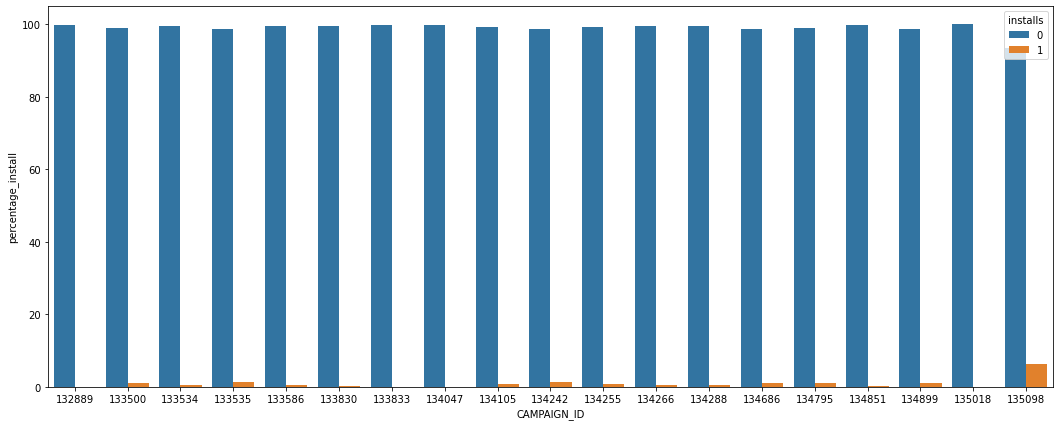

In [9]:
df_campaign_impressions = impressions[impressions['CAMPAIGN_ID'].isin(impressions_install['CAMPAIGN_ID'].unique().tolist())]
df_campaign_impressions_value_counts = df_campaign_impressions['CAMPAIGN_ID'].value_counts().to_frame().reset_index()
df_campaign_impressions_value_counts.columns = ['CAMPAIGN_ID', 'total_occurrences']


df_campaign_counts = (df_campaign_impressions.groupby(['CAMPAIGN_ID'])['installs']
                     .value_counts(normalize=True)
                     .rename('percentage_install')
                     .mul(100)
                     .reset_index()
                     .sort_values('installs'))


df_campaign_counts['total_occurrences'] = df_campaign_counts['CAMPAIGN_ID'].map(df_campaign_impressions_value_counts.set_index('CAMPAIGN_ID')['total_occurrences'])

plt.figure(figsize=(18,7))
sns.barplot(x="CAMPAIGN_ID", y="percentage_install", hue="installs", data=df_campaign_counts)
plt.show()

In [50]:
df_campaign_counts[df_campaign_counts['installs'] == 1].sort_values(by = 'percentage_install', ascending = False)

,CAMPAIGN_ID,installs,percentage_install,total_occurrences
37,135098,1,6.451613,31
19,134242,1,1.359223,515
7,133535,1,1.224490,245
27,134686,1,1.160261,2758
33,134899,1,1.158301,259
3,133500,1,1.046338,669
29,134795,1,0.995636,70809
17,134105,1,0.818148,10756
21,134255,1,0.667468,7491
5,133534,1,0.512645,5852


In [110]:
impressions_install['CAMPAIGN_ID'].value_counts()

134795    705
134288    147
134105     88
134255     50
134047     49
134686     32
133534     30
133833     22
133830     21
132889     20
134266     11
133500      7
134242      7
133586      5
133535      3
134899      3
135018      2
135098      2
134851      1
Name: CAMPAIGN_ID, dtype: int64

# Creative_ID_1

In [121]:
df_creative_ID_impressions = impressions[impressions['CREATIVE_ID_1'].isin(impressions_install['CREATIVE_ID_1'].unique().tolist())]
df_creative_ID_impressions_value_counts = df_creative_ID_impressions['CREATIVE_ID_1'].value_counts().to_frame().reset_index()
df_creative_ID_impressions_value_counts.columns = ['CREATIVE_ID', 'total_occurrences']

df_creative_ID_counts = (df_creative_ID_impressions.groupby(['CREATIVE_ID_1'])['installs']
                     .value_counts(normalize=True)
                     .rename('percentage_install')
                     .mul(100)
                     .reset_index()
                     .sort_values('installs'))

df_creative_ID_counts['total_occurrences'] = df_creative_ID_counts['CREATIVE_ID_1'].map(df_creative_ID_impressions_value_counts.set_index('CREATIVE_ID')['total_occurrences'])

#plt.figure(figsize=(18,7))
#sns.barplot(x="CREATIVE_ID_1", y="percentage_install", hue="installs", data=df_creative_ID_counts)
#plt.show()

In [27]:
df_creative_ID_counts[df_creative_ID_counts['installs'] == 1].sort_values(by = 'percentage_install', ascending = False)

,CREATIVE_ID_1,installs,percentage_install,total_occurrences
23,50250940,1,2.173913,138
21,50250938,1,1.792115,279
15,50250934,1,1.657459,362
9,50250929,1,1.374570,291
27,50253349,1,1.261830,317
7,50250928,1,1.001669,599
17,50250935,1,0.966184,207
49,50254338,1,0.858369,233
31,50253354,1,0.850397,89370
11,50250932,1,0.847458,118


In [109]:
impressions_install['CREATIVE_ID_1'].value_counts()


50253354    760
50250933     79
50253086     68
50253358     62
50253356     41
50253355     37
50254305     34
50254303     27
50253353     23
50245528     18
50254304     14
50250934      6
50250928      6
50250938      5
50253349      4
50250929      4
50250940      3
50245525      3
50250935      2
50254338      2
50254336      2
50245500      2
50250932      1
50254334      1
50250936      1
Name: CREATIVE_ID_1, dtype: int64

# IAB_CATEGORY_ID_1

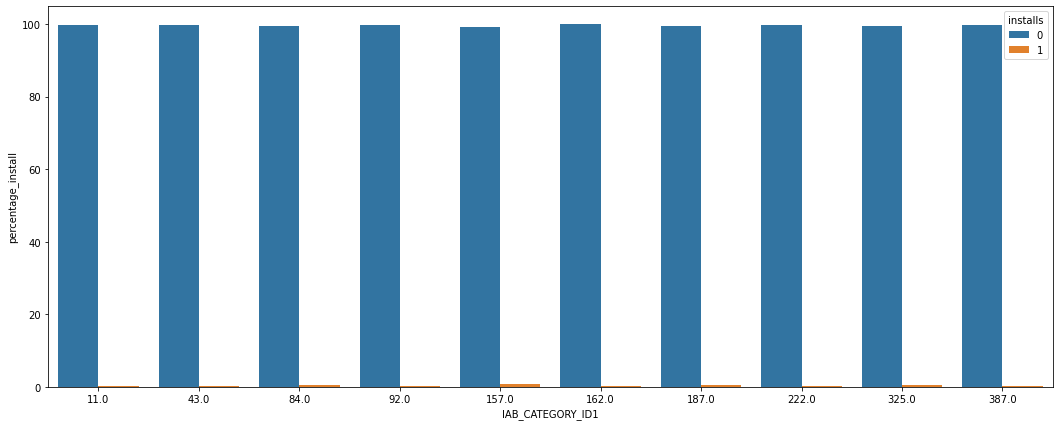

In [32]:
df_IAB_CATEGORY_ID1_impressions = impressions[impressions['IAB_CATEGORY_ID1'].isin(impressions_install['IAB_CATEGORY_ID1'].unique().tolist())]
df_IAB_CATEGORY_ID1_impressions_value_counts = df_IAB_CATEGORY_ID1_impressions['IAB_CATEGORY_ID1'].value_counts().to_frame().reset_index()
df_IAB_CATEGORY_ID1_impressions_value_counts.columns = ['IAB_CATEGORY_ID1', 'total_occurrences']

df_IAB_CATEGORY_ID1_counts = (df_IAB_CATEGORY_ID1_impressions.groupby(['IAB_CATEGORY_ID1'])['installs']
                     .value_counts(normalize=True)
                     .rename('percentage_install')
                     .mul(100)
                     .reset_index()
                     .sort_values('installs'))

df_IAB_CATEGORY_ID1_counts['total_occurrences'] = df_IAB_CATEGORY_ID1_counts['IAB_CATEGORY_ID1'].map(df_IAB_CATEGORY_ID1_impressions_value_counts.set_index('IAB_CATEGORY_ID1')['total_occurrences'])

plt.figure(figsize=(18,7))
sns.barplot(x="IAB_CATEGORY_ID1", y="percentage_install", hue="installs", data=df_IAB_CATEGORY_ID1_counts)
plt.show()

In [70]:
df_IAB_CATEGORY_ID1_counts[df_IAB_CATEGORY_ID1_counts['installs'] == 1].sort_values(by = 'percentage_install', ascending = False)

,IAB_CATEGORY_ID1,installs,percentage_install,total_occurrences
9,157.0,1,0.797351,36245
5,84.0,1,0.618238,647
13,187.0,1,0.549528,7097
17,325.0,1,0.413793,725
1,11.0,1,0.350737,25090
7,92.0,1,0.278552,359
19,387.0,1,0.237643,2104
3,43.0,1,0.137300,2185
15,222.0,1,0.133659,29927
11,162.0,1,0.112486,889


In [108]:
impressions_install['IAB_CATEGORY_ID1'].value_counts()

157.0    289
11.0      88
222.0     40
187.0     39
387.0      5
84.0       4
325.0      3
43.0       3
162.0      1
92.0       1
Name: IAB_CATEGORY_ID1, dtype: int64

In [67]:
impressions_install['IAB_CATEGORY_ID1'].isna().sum()

170593

# EXCHANGE_ID

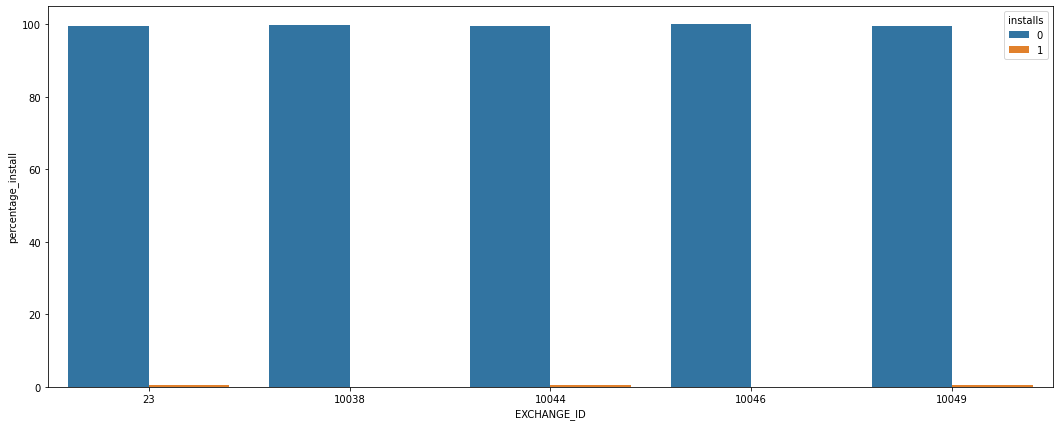

In [38]:
df_EXCHANGE_ID_impressions = impressions[impressions['EXCHANGE_ID'].isin(impressions_install['EXCHANGE_ID'].unique().tolist())]
df_EXCHANGE_ID_impressions_value_counts = df_EXCHANGE_ID_impressions['EXCHANGE_ID'].value_counts().to_frame().reset_index()
df_EXCHANGE_ID_impressions_value_counts.columns = ['EXCHANGE_ID', 'total_occurrences']

df_EXCHANGE_ID_counts = (df_EXCHANGE_ID_impressions.groupby(['EXCHANGE_ID'])['installs']
                     .value_counts(normalize=True)
                     .rename('percentage_install')
                     .mul(100)
                     .reset_index()
                     .sort_values('installs'))


df_EXCHANGE_ID_counts['total_occurrences'] = df_EXCHANGE_ID_counts['EXCHANGE_ID'].map(df_EXCHANGE_ID_impressions_value_counts.set_index('EXCHANGE_ID')['total_occurrences'])
plt.figure(figsize=(18,7))
sns.barplot(x="EXCHANGE_ID", y="percentage_install", hue="installs", data=df_EXCHANGE_ID_counts)
plt.show()

In [39]:
df_EXCHANGE_ID_counts[df_EXCHANGE_ID_counts['installs'] == 1].sort_values(by = 'percentage_install', ascending = False)

,EXCHANGE_ID,installs,percentage_install,total_occurrences
1,23,1,0.549853,76384
9,10049,1,0.452180,11721
5,10044,1,0.430483,169577
3,10038,1,0.027270,3667
7,10046,1,0.011448,8735


In [107]:
impressions_install['EXCHANGE_ID'].value_counts()

10044    730
23       420
10049     53
10046      1
10038      1
Name: EXCHANGE_ID, dtype: int64

# App_ID

In [120]:
df_App_ID_impressions = impressions[impressions['App Id'].isin(impressions_install['App Id'].unique().tolist())]
df_App_ID_impressions_value_counts = df_App_ID_impressions['App Id'].value_counts().to_frame().reset_index()
df_App_ID_impressions_value_counts.columns = ['App Id', 'total_occurrences']

df_App_ID_counts = (df_App_ID_impressions.groupby(['App Id'])['installs']
                     .value_counts(normalize=True)
                     .rename('percentage_install')
                     .mul(100)
                     .reset_index()
                     .sort_values('installs'))


df_App_ID_counts['total_occurrences'] = df_App_ID_counts['App Id'].map(df_App_ID_impressions_value_counts.set_index('App Id')['total_occurrences'])

#plt.figure(figsize=(18,7))
#sns.barplot(x="App Id", y="percentage_install", hue="installs", data=df_App_ID_counts)
#plt.show()

In [96]:
df_app_id_percent = df_App_ID_counts[df_App_ID_counts['installs'] == 1].sort_values(by = 'percentage_install', ascending = False)
df_app_id_percent[df_app_id_percent['total_occurrences'] > 500]


,App Id,installs,percentage_install,total_occurrences
288,1436008834,1,3.108808,772
212,1384410451,1,2.297090,653
286,1435899684,1,2.235772,1476
284,1435807944,1,1.928640,1037
155,1323088931,1,1.712780,759
7,1031509294,1,1.589404,755
39,1093190533,1,1.499167,5403
258,1423527464,1,1.293532,1005
260,1423608757,1,1.261777,5944
197,1355694041,1,1.251203,2078


In [106]:
impressions_install['App Id'].value_counts()

1320296369    209
1047961826    179
1093190533     81
1423608757     75
1435899684     33
             ... 
656971078       1
1093108529      1
995336631       1
1243426580      1
1332911785      1
Name: App Id, Length: 176, dtype: int64

# For question 2, keep only duplicate raw user IDs to understand effects of multiple impressions

In [99]:
impressions_frequency = impressions[impressions.duplicated(['Raw User Id'], keep=False)]
installs_users=impressions_frequency[impressions_frequency['installs']== 1]
unique_ids=installs_users['Raw User Id'].unique()

In [100]:
def userdata(id):
    #visits
    userdata=impressions_frequency[impressions_frequency['Raw User Id']== id]
    userdata=userdata.sort_values(by='Epoch Timestamp',ascending=True) #sorting  
    installs_data=userdata.installs.to_list()
    total_sessions=len(installs_data)
    
    #install on session number
    install_on_session= installs_data.index(1)+1
    
    #interval
    timestamp=userdata['Epoch Timestamp'].to_list()
    interval=timestamp[install_on_session-1]-timestamp[0]
    interval=round(interval/60,2)
    
    
    return total_sessions,install_on_session,interval

In [101]:
total_sessions_l=[]
install_on_session_l=[]
interval_l=[]

for id in unique_ids:
    total_sessions,install_on_session,interval=userdata(id)
    total_sessions_l.append(total_sessions)
    install_on_session_l.append(install_on_session)
    interval_l.append(interval)
    
session_df=pd.DataFrame({'Raw User Id':unique_ids,
                       'total_sessions':total_sessions_l,
                       'install_on_session_number':install_on_session_l,
                       'interval_between_firstSession_and_install (Mins)':interval_l})

In [102]:
session_df.describe()

,total_sessions,install_on_session_number,interval_between_firstSession_and_install (Mins)
count,499.000000,499.000000,499.000000
mean,4.268537,3.402806,1144.891222
std,7.633684,5.423813,1517.096736
min,2.000000,1.000000,0.000000
25%,2.000000,2.000000,1.990000
50%,3.000000,2.000000,50.870000
75%,4.000000,3.000000,2016.370000
max,126.000000,94.000000,5930.080000


Text(0.5, 0, 'Index number')

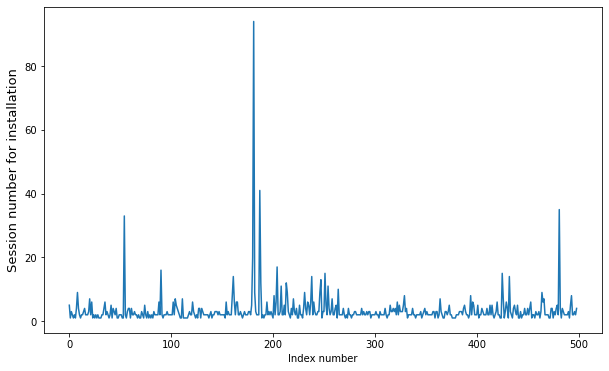

In [105]:
plt.figure(figsize=(10,6))
plt.plot(session_df.install_on_session_number)
plt.ylabel('Session number for installation',fontsize=13);
plt.xlabel('Index number')

Text(0.5, 0, 'Index number')

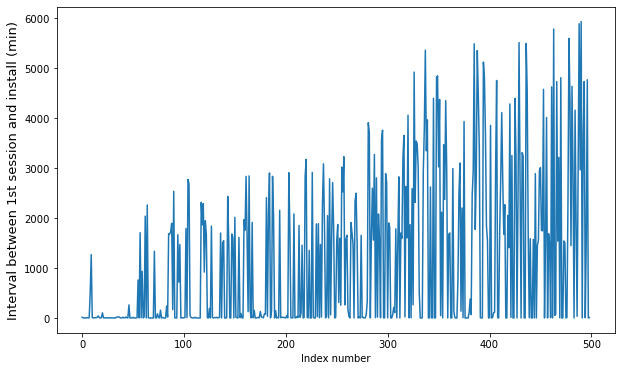

In [114]:
plt.figure(figsize=(10,6))
plt.plot(session_df['interval_between_firstSession_and_install (Mins)'])
plt.ylabel('Interval between 1st session and install (min)',fontsize=13);
plt.xlabel('Index number')

## Random forest for feature exploration

In [41]:
Features=impressions.drop(['Raw User Id','App Id','Unique Id','IAB_CATEGORY_ID1','installs'],axis=1)
Outcome=impressions['installs']

Separating the feature columns and outcome.

In [43]:
Features['REQ_COUNTRY_ID']=Features['REQ_COUNTRY_ID'].astype('object')
Features['EXCHANGE_ID']=Features['EXCHANGE_ID'].astype('object')
Features['CAMPAIGN_ID']=Features['CAMPAIGN_ID'].astype('object')
Features['CREATIVE_ID_1']=Features['CREATIVE_ID_1'].astype('object')

Changing the data types of the ID columns to 'objects' to one hot encode them.

In [44]:
Features.dtypes

REQ_COUNTRY_ID     object
EXCHANGE_ID        object
DEVICE_OS           int64
CAMPAIGN_ID        object
CREATIVE_ID_1      object
Epoch Timestamp     int64
clicks              int32
dtype: object

In [45]:
Features=pd.get_dummies(Features,drop_first=True)
Features

,DEVICE_OS,Epoch Timestamp,clicks,REQ_COUNTRY_ID_11,REQ_COUNTRY_ID_14,REQ_COUNTRY_ID_24,REQ_COUNTRY_ID_26,REQ_COUNTRY_ID_28,REQ_COUNTRY_ID_33,REQ_COUNTRY_ID_42,...,CREATIVE_ID_1_50254304,CREATIVE_ID_1_50254305,CREATIVE_ID_1_50254332,CREATIVE_ID_1_50254333,CREATIVE_ID_1_50254334,CREATIVE_ID_1_50254335,CREATIVE_ID_1_50254336,CREATIVE_ID_1_50254337,CREATIVE_ID_1_50254338,CREATIVE_ID_1_50254339
0,12,1544763675,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,12,1544766534,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,12,1544764471,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,12,1544764503,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,12,1544764911,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279916,12,1545134308,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
279917,12,1545134328,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
279918,12,1545134329,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
279919,12,1545134357,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Using Random Forest Classifier we will be obtaining the feature importances

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Splitting the data into train and test

In [48]:
feature_names=Features.columns

x_train,x_test,y_train,y_test=train_test_split(Features,Outcome,test_size=0.2,random_state=42)

In [49]:
rf=RandomForestClassifier(n_estimators=50)
rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=50)

In [50]:
y_pred=rf.predict(x_test)
accuracy_score(y_test,y_pred)

0.9949093507189426

By evalutualing the predicition we get 99% accuracy from the model

In [51]:
rf.feature_importances_

array([0.00000000e+00, 6.00219588e-01, 2.82666209e-01, 5.65013264e-05,
       0.00000000e+00, 2.79169424e-04, 0.00000000e+00, 3.68445645e-07,
       0.00000000e+00, 5.14503969e-07, 7.35288699e-08, 1.40983988e-03,
       7.80304433e-05, 1.19411901e-09, 1.59283014e-05, 1.99410809e-08,
       2.13541571e-07, 0.00000000e+00, 2.74390194e-08, 3.89742409e-08,
       0.00000000e+00, 8.64098226e-09, 2.63745464e-04, 7.96265972e-09,
       7.65475417e-07, 2.74499448e-08, 6.05203067e-12, 4.51584355e-09,
       2.83702566e-08, 5.25703716e-06, 3.47487456e-04, 5.31954694e-08,
       2.40982579e-10, 0.00000000e+00, 2.11200538e-04, 3.25953220e-04,
       2.04136203e-08, 1.52444767e-07, 3.98442500e-07, 5.93154014e-09,
       5.68168589e-09, 5.51652166e-06, 0.00000000e+00, 5.53618705e-04,
       2.63911168e-09, 8.63706722e-06, 1.06718429e-07, 4.85521365e-08,
       5.38413924e-09, 1.25062854e-06, 5.78149486e-09, 2.79568873e-07,
       3.86465867e-12, 1.57514351e-08, 6.26304161e-04, 3.30449950e-08,
      

Feature Importance obtained from the Random Forest Classifier

In [52]:
feature_importance=pd.DataFrame({'Features':feature_names,'Importance':rf.feature_importances_})
feature_importance.sort_values(by='Importance',inplace=True,ascending=False)

In [53]:
feature_importance_top25=feature_importance.head(25)

We have 167 features in total, we will be only plotting top 25 features as rest of them have very small value.

Text(0.5, 1.0, 'Feature Importance')

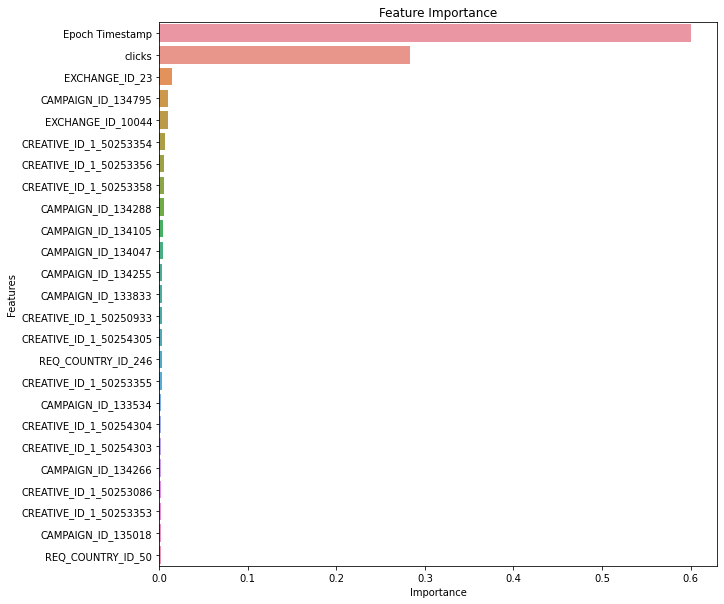

In [54]:
plt.figure(figsize=(10,10))
sns.barplot(y='Features',x='Importance',data=feature_importance_top25)
plt.title('Feature Importance')

This barplot shows the features importance for the different features obtained from the Random Forest Classifier model which has an accuracy of 99%.